<a href="https://colab.research.google.com/github/AmeerMohammadJafari/TensorFlow-and-Keras-mini-projects/blob/main/01_basics/linear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x[0] = 0

TypeError: ignored

We can not change the state of a tensor, so we must use tf.Variable for training our model

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.0472564 ],
       [1.0726761 ],
       [0.46542296]], dtype=float32)>


In [ ]:
v[0, 0].assign(3.)
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.        ],
       [1.0726761 ],
       [0.46542296]], dtype=float32)>


In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


Now it's time to generate a simple dataset

In [ ]:
import numpy as np

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
).T
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
).T

In [ ]:
negative_samples.shape, positive_samples.shape

((2, 1000), (2, 1000))

In [ ]:
inputs = np.hstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.hstack(
    (np.zeros((1, num_samples_per_class), dtype='float32'),
    np.ones((1, num_samples_per_class), dtype='float32')
    )
)

In [ ]:
inputs.shape, targets.shape

((2, 2000), (1, 2000))

In [ ]:
import matplotlib.pyplot as plt

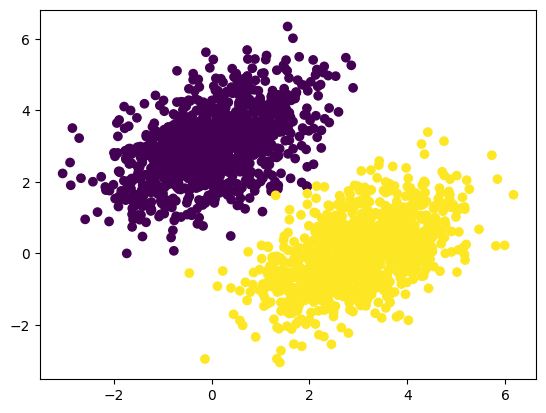

In [ ]:
plt.scatter(inputs[0, :], inputs[1, :], c=targets[0, :])
plt.show()

In [ ]:
w = tf.Variable(initial_value=tf.random.uniform(shape=(1, 2)))
b = tf.Variable(initial_value=tf.zeros(shape=(1,)))
def model(inputs):
    return tf.matmul(w, inputs) + b

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [ ]:
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_w, grad_loss_b = tape.gradient(loss, [w, b])
    w.assign_sub(grad_loss_w * learning_rate)
    b.assign_sub(grad_loss_b * learning_rate)
    return loss

In [ ]:
for epoch in range(40):
    loss = training_step(inputs, targets)
    print(f'loss at epoch {epoch}: {loss:.4f}')

loss at epoch 0: 0.0966
loss at epoch 1: 0.0903
loss at epoch 2: 0.0846
loss at epoch 3: 0.0795
loss at epoch 4: 0.0748
loss at epoch 5: 0.0705
loss at epoch 6: 0.0666
loss at epoch 7: 0.0630
loss at epoch 8: 0.0598
loss at epoch 9: 0.0568
loss at epoch 10: 0.0540
loss at epoch 11: 0.0515
loss at epoch 12: 0.0493
loss at epoch 13: 0.0472
loss at epoch 14: 0.0453
loss at epoch 15: 0.0435
loss at epoch 16: 0.0419
loss at epoch 17: 0.0405
loss at epoch 18: 0.0392
loss at epoch 19: 0.0379
loss at epoch 20: 0.0368
loss at epoch 21: 0.0358
loss at epoch 22: 0.0349
loss at epoch 23: 0.0340
loss at epoch 24: 0.0333
loss at epoch 25: 0.0326
loss at epoch 26: 0.0319
loss at epoch 27: 0.0313
loss at epoch 28: 0.0308
loss at epoch 29: 0.0303
loss at epoch 30: 0.0298
loss at epoch 31: 0.0294
loss at epoch 32: 0.0290
loss at epoch 33: 0.0287
loss at epoch 34: 0.0284
loss at epoch 35: 0.0281
loss at epoch 36: 0.0278
loss at epoch 37: 0.0276
loss at epoch 38: 0.0274
loss at epoch 39: 0.0272


Drawing linear model

In [ ]:
w.shape

TensorShape([1, 2])

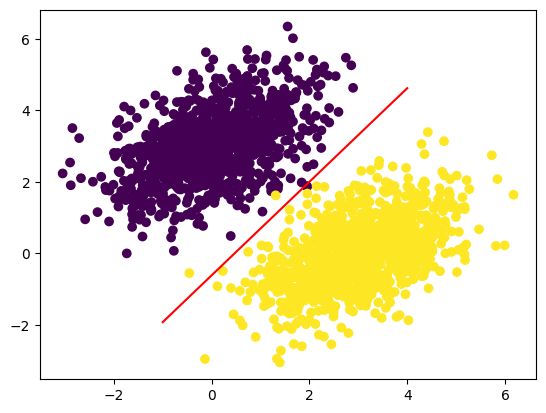

In [ ]:
x = np.linspace(-1, 4, 200)
y = (0.5 - b - w[0, 0] * x) / w[0, 1]
plt.plot(x, y, 'r')
plt.scatter(inputs[0, :], inputs[1, :], c=targets[0, :])

In [ ]:
from tensorflow import keras

In [ ]:
class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[0]
        self.W = self.add_weight(shape=(self.units ,input_dim), initializer='random_normal')
        self.b = self.add_weight(shape=(self.units, 1), initializer='zeros')

    def call(self, inputs):
        y = tf.matmul(self.W, inputs) + self.b
        if self.activation:
            y = self.activation(y)
        return y

In [ ]:
simple_dense = SimpleDense(32, tf.nn.relu)
input_tensor = tf.ones(shape=(2, 1000))
output_tensor = simple_dense(input_tensor)
output_tensor.shape

TensorShape([32, 1000])